In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, AveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.regularizers import l2

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2023-04-03 19:12:49--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.0
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  12.8MB/s    in 14s     

2023-04-03 19:13:03 (11.0 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



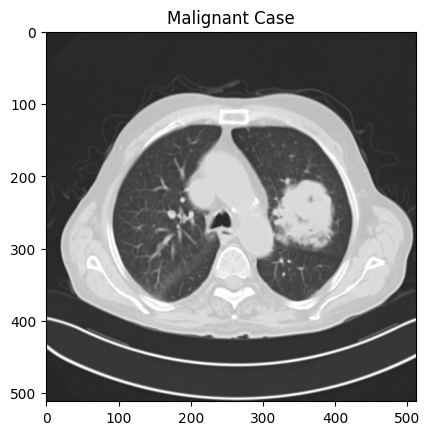

In [3]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [4]:
img_width = 64
img_height = 64
batch_size = 8
nb_epoch = 10000
# datagen = ImageDataGenerator(rescale = 1/255.0,
#                              width_shift_range=[0,0.8], # horizontal shift
#                              height_shift_range=[0,0.8], # vertical shift
#                              zoom_range=[0,0.8], # zoom
#                              horizontal_flip=True, # horizontal flip
#                              brightness_range=[0.1,1.2], # brightness
#                              validation_split = 0.2)

# datagen = ImageDataGenerator(rescale = 1/255.0,
#                              zoom_range=[0,0.4], # zoom
#                              horizontal_flip=True, # horizontal flip
#                              brightness_range=[0.1,0.5], # brightness
#                              validation_split = 0.2)

datagen = ImageDataGenerator(rescale = 1/255.0,
                             validation_split = 0.3)

train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", 
                                                   target_size = (img_width, img_height), 
                                                   color_mode="grayscale", 
                                                   class_mode="categorical", 
                                                   batch_size = batch_size, 
                                                   subset = "training", 
                                                   shuffle="True")
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", 
                                                        target_size = (img_width, img_height),
                                                        color_mode="grayscale", 
                                                        class_mode="categorical", 
                                                        batch_size = batch_size,
                                                        subset = "validation")

Found 755 images belonging to 3 classes.
Found 322 images belonging to 3 classes.


In [5]:
# model = Sequential()

# model.add(Conv2D(64, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
# model.add(Dropout(0.7))
# model.add(MaxPool2D(2,2))

# model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
# model.add(Dropout(0.6))
# model.add(MaxPool2D(2,2))

# model.add(Flatten())

# model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(64,activation="relu"))

# model.add(Dense(3, activation="softmax"))

In [10]:
# model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-5), kernel_regularizer=regularizers.L2(l2=1e-3), padding='same', input_shape=(img_width, img_height,1)))
# model.add(Dropout(0.5))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-5), kernel_regularizer=regularizers.L2(l2=1e-3),bias_regularizer=regularizers.L2(1e-4), padding='same'))
# model.add(Dropout(0.5))
# model.add(MaxPool2D((2, 2)))
# model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-5), kernel_regularizer=regularizers.L2(l2=1e-3), bias_regularizer=regularizers.L2(1e-4), padding='same'))
# model.add(Dropout(0.5))
# model.add(MaxPool2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(32, activation='relu',bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5), kernel_regularizer=regularizers.L2(l2=1e-3), kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu',bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5), kernel_regularizer=regularizers.L2(l2=1e-3), kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))

# model.add(Dense(3, activation='softmax'))

model = Sequential()

model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-3), kernel_regularizer=regularizers.L2(l2=1e-3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.6))
model.add(Conv2D(256,(3,3), kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-3), kernel_regularizer=regularizers.L2(l2=1e-3), bias_regularizer=regularizers.L2(1e-3), padding ="same", activation="relu"))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.6))
model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-3), kernel_regularizer=regularizers.L2(l2=1e-3), bias_regularizer=regularizers.L2(1e-3), padding ="same", activation="relu"))
model.add(Dropout(0.6))
model.add(Flatten())

model.add(Dense(64, kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-3), kernel_regularizer=regularizers.L2(l2=1e-3), bias_regularizer=regularizers.L2(1e-3),activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(32, kernel_initializer='he_uniform',activity_regularizer=regularizers.L2(1e-3), kernel_regularizer=regularizers.L2(l2=1e-3), bias_regularizer=regularizers.L2(1e-3),activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(3, activation="softmax"))

In [7]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_data_generator.classes), y=train_data_generator.classes)
class_weights = dict(zip(np.unique(train_data_generator.classes), class_weights))
class_weights

{0: 3.1856540084388185, 1: 0.6469580119965724, 2: 0.8768873403019745}

In [8]:
checkpoint_filepath = 'C:\\Users\\benja\\Desktop\\WEIGHTS'

my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, restore_best_weights = True),
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=30, min_lr=6e-5),
               tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True)]

In [11]:
model.compile(optimizer='nadam', loss="categorical_crossentropy", metrics=['accuracy','Precision','Recall','FalseNegatives','AUC'])

history=model.fit(train_data_generator,
                  steps_per_epoch=len(train_data_generator), 
                  epochs=nb_epoch, 
                  validation_data=validation_data_generator, 
                  validation_steps = len(validation_data_generator), 
                  callbacks=my_callback)

Epoch 1/10000
95/95 [==============================] - 15s 88ms/step - loss: 267.9752 - accuracy: 0.4768 - precision: 0.4689 - recall: 0.1099 - false_negatives: 672.0000 - auc: 0.6652 - val_loss: 143.7265 - val_accuracy: 0.5155 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_false_negatives: 322.0000 - val_auc: 0.7065 - lr: 0.0010
Epoch 2/10000
95/95 [==============================] - 8s 87ms/step - loss: 88.8525 - accuracy: 0.4967 - precision: 0.5172 - recall: 0.2185 - false_negatives: 590.0000 - auc: 0.7037 - val_loss: 52.3942 - val_accuracy: 0.5155 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_false_negatives: 322.0000 - val_auc: 0.7229 - lr: 0.0010
Epoch 3/10000
95/95 [==============================] - 8s 88ms/step - loss: 34.9590 - accuracy: 0.4980 - precision: 0.5434 - recall: 0.2490 - false_negatives: 567.0000 - auc: 0.7158 - val_loss: 23.0510 - val_accuracy: 0.5155 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_false_negatives: 322.0000 - val

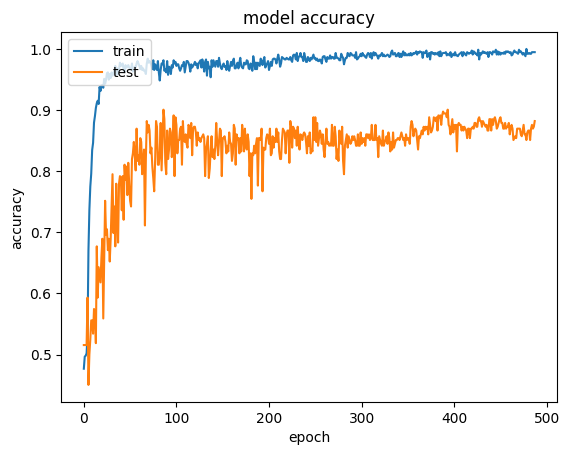

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

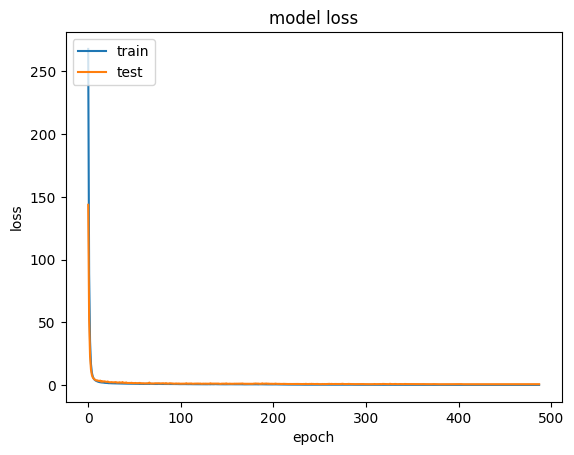

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

41/41 [==============================] - 3s 57ms/step


<Axes: >

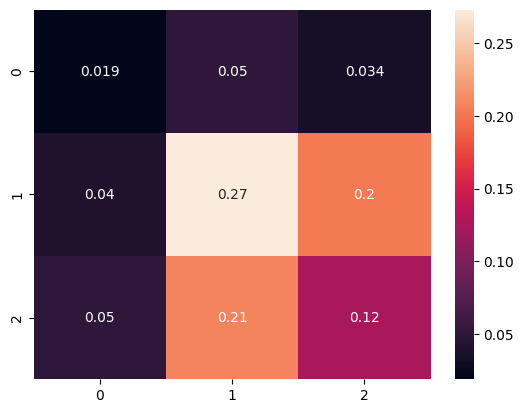

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix  = confusion_matrix(validation_data_generator.classes, np.argmax(model.predict(validation_data_generator),axis=1))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True)

# **Preparing Test Data for prediction**

In [15]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test", 
                                                  target_size = (img_width, img_height), 
                                                  color_mode="grayscale", 
                                                  class_mode="categorical", 
                                                  batch_size = 10, 
                                                  subset = "training")

Found 16 images belonging to 3 classes.


In [16]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(5):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

1/1 [==============================] - 0s 18ms/step


In [17]:
cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Benign', 1: 'Malignant', 2: 'Malignant', 3: 'Benign', 4: 'Normal'}
PREDICTIONS: {0: 'Normal', 1: 'Malignant', 2: 'Malignant', 3: 'Malignant', 4: 'Normal'}


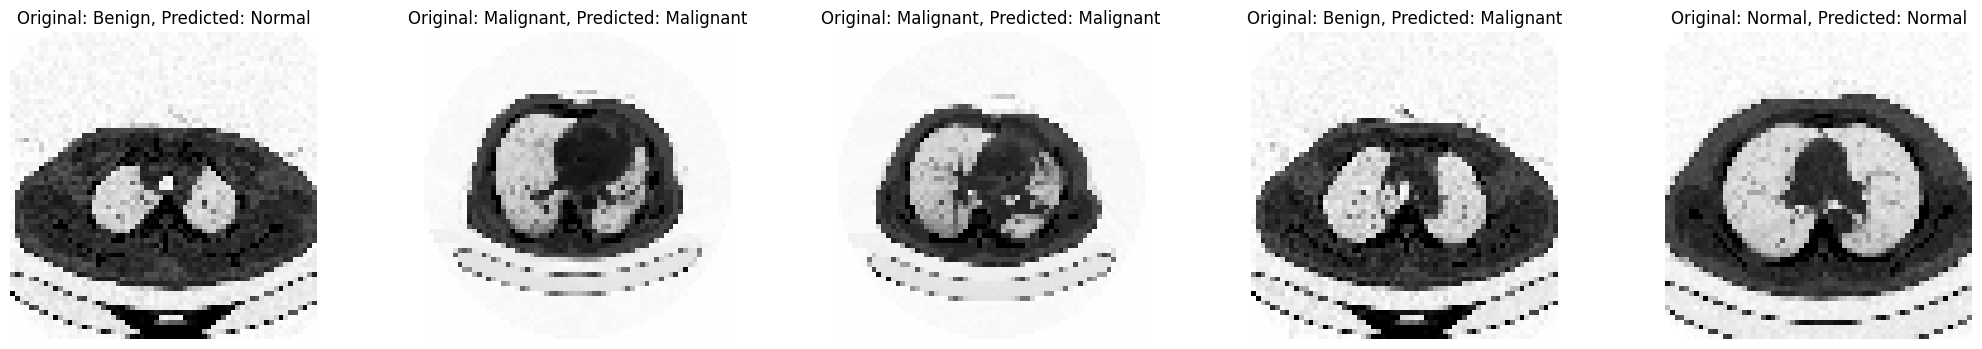

In [18]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()